In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

from plot_confusion_matrix import plot_confusion_matrix 

In [5]:
data=pd.read_csv("creditcard.csv")
data.shape

(284807, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.describe().round(decimals=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [8]:
# column name
print('Columns:', list(data))
print('Number of columns:', len(list(data)))

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Number of columns: 31


### In this dataset, each row is labelled as fraud or genuine
1) 1 denotes fraud
2) 0 denotes genuine

In [9]:
n_genuine = len(data[data['Class'] == 0])
n_fraud = len(data[data['Class'] == 1])

Number of genuine transactions : 284315
Number of genuine transactions : 492


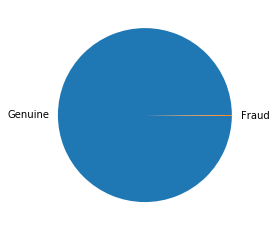

In [11]:
print('Number of genuine transactions :', n_genuine)
print('Number of fraud transactions :', n_fraud)

plt.pie([n_genuine, n_fraud], labels=['Genuine', 'Fraud'], radius = 1)
plt.show()

### Data Preprocessing

In [15]:
# separate features and labels with a slicing operation
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
# fit() function computes the scores and selectes the k best features
k = 10
k_best = SelectKBest(f_classif, k=k)
k_best.fit(X,y)

SelectKBest()

In [18]:
# discard all the "bad" features
mask = k_best.get_support()
not_mask = np.logical_not(mask)

all_features = np.array(list(X))

best_features = all_features[mask]
bad_features = all_features[not_mask]

print('Best Features :', best_features)
print('Bad Features :', bad_features)

Best Features : ['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']
Bad Features : ['Time' 'V1' 'V2' 'V5' 'V6' 'V8' 'V9' 'V13' 'V15' 'V19' 'V20' 'V21' 'V22'
 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount']


In [19]:
X = X.drop(bad_features, axis=1)
X.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


### Plot a distribution plots of best features and bad features to observe the distribution of the data 

In [28]:
def plot_fraud_genuine(features, data):
    plt_index=0
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for feature in features:
        plt_index+=1
        feature_data=pd.concat([data[feature], data['Class']], axis=1)
        fraud = feature_data[data['Class'] == 1]
        genuine = feature_data[data['Class'] == 0]
        if len(genuine > 10000):
            genuine = genuine[::100]
        plt.subplot(5,5,plt_index)
        sns.distplot(fraud[feature])
        sns.distplot(genuine[feature])
        plt.title(feature)

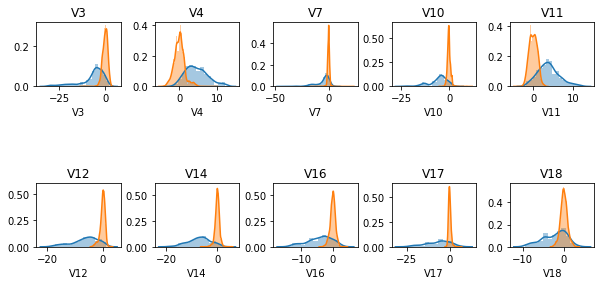

In [29]:
plot_fraud_genuine(best_features, data)

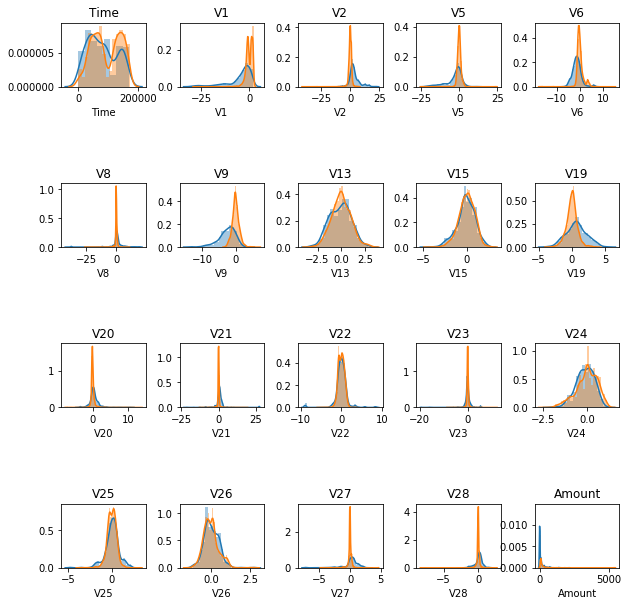

In [30]:
plot_fraud_genuine(bad_features, data)

### Step-3: Train Model

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# cross validation
nb = GaussianNB()
cv_results = cross_validate(nb, x_train, y_train, cv=10,
                           scoring='recall',
                           return_train_score=True,
                           return_estimator=True)

In [36]:
print('Training score from each fold :', cv_results['train_score'])
max_score_index = np.argmax(cv_results['train_score'])
best_estimator = cv_results['estimator'][max_score_index]

Training score from each fold : [0.8551532  0.85793872 0.86072423 0.86350975 0.86072423 0.85277778
 0.84679666 0.86072423 0.85793872 0.84958217]


### Step4: Evaluation and Visualization

In [43]:
def display_results(estimator, x, y):
    predicted = estimator.predict(x)
    cm = confusion_matrix(y, predicted)
    report = classification_report(y, predicted)
    print(report)
#     plot_confusion_matrix(cm, classes=['Genuine','Fraud'], title='Fraud Detection')

In [44]:
# display result for the testing data set
display_results(best_estimator, x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56869
           1       0.14      0.84      0.23        93

    accuracy                           0.99     56962
   macro avg       0.57      0.91      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [45]:
# display result for the training data set
display_results(best_estimator, x_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227446
           1       0.15      0.85      0.25       399

    accuracy                           0.99    227845
   macro avg       0.57      0.92      0.62    227845
weighted avg       1.00      0.99      0.99    227845

